In [1]:
import numpy as np
import pandas as pd

desa=pd.read_csv('대사중후군.csv', encoding='CP949')
desa.head()

,ex1ex2co,exco,site,wc1,wc2,tg1,tg2,hdl1,hdl2,ldl1,...,rlp,bp,ghp,psh,vitality,sof,RLE,mh,meh,삶의질
0,3,2,5,98.2,96.6,150,86,65,46,248,...,0,24.44,5.0,21.11,5.0,62.5,100.00,52,54.88,37.99
1,2,1,5,85.3,80.1,141,60,64,54,249,...,0,71.11,35.0,37.08,50.0,50.0,0.00,24,31.00,34.04
2,3,2,1,139.3,139.7,313,199,50,63,114,...,100,34.44,45.0,53.61,30.0,100.0,100.00,48,69.50,61.56
3,2,1,4,92.4,93.0,104,104,52,52,164,...,25,82.22,25.0,50.41,60.0,75.0,33.33,64,58.08,54.24
4,3,2,1,103.7,105.5,216,130,43,51,117,...,75,82.22,40.0,63.06,50.0,62.5,66.67,64,60.79,61.92


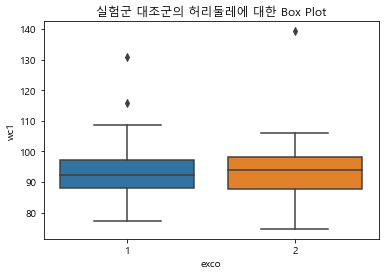

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

#한글폰트 파일실행(방법1)

!python han-font.py
exec(open('han-font.py').read())

desa['exco'] = desa['exco'].astype(object)
sns.boxplot(x=desa['exco'], y=desa['wc1'], data=desa)
plt.title("실험군 대조군의 허리둘레에 대한 Box Plot")
plt.show()

In [5]:
desa.groupby(['exco']).describe()[['wc1']]

wc1                                                          
     count       mean        std   min     25%    50%     75%    max
exco                                                                
1     71.0  93.502817   8.575646  77.4  88.050  92.40  97.150  131.0
2     20.0  94.885000  12.885580  74.7  87.675  94.05  98.275  139.3

In [7]:
desa.groupby(['exco']).mean()[['wc1']]

,wc1
exco,
1,93.502817
2,94.885000


In [8]:
desa.groupby(['exco']).mean()[['wc1', 'wc2', 'tg1', 'tg2']]

,wc1,wc2,tg1,tg2
exco,,,,
1,93.502817,89.401408,169.366197,139.084507
2,94.885000,95.200000,238.200000,172.750000


In [9]:
desa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 47 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ex1ex2co  91 non-null     int64  
 1   exco      91 non-null     object 
 2   site      91 non-null     int64  
 3   wc1       91 non-null     float64
 4   wc2       91 non-null     float64
 5   tg1       91 non-null     int64  
 6   tg2       91 non-null     int64  
 7   hdl1      91 non-null     int64  
 8   hdl2      91 non-null     int64  
 9   ldl1      91 non-null     int64  
 10  ldl2      91 non-null     int64  
 11  gl1       91 non-null     int64  
 12  gl2       91 non-null     int64  
 13  sbp1      91 non-null     int64  
 14  sbp2      91 non-null     int64  
 15  dsp1      91 non-null     int64  
 16  dsp2      91 non-null     int64  
 17  we1       91 non-null     float64
 18  we2       91 non-null     float64
 19  체지방1      91 non-null     float64
 20  체지방2      91 non-null     float64


In [11]:
before=desa.iloc[:,[3, 5, 7, 9, 11, 13, 15, 17, 19, 21]]
before.describe()

,wc1,tg1,hdl1,ldl1,gl1,sbp1,dsp1,we1,체지방1,bmi1
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,93.806593,184.494505,53.241758,126.769231,110.956044,132.450549,79.076923,61.615385,38.020879,26.654945
std,9.621998,105.552764,13.487723,39.031918,30.531191,19.591531,12.002065,10.076198,5.392598,3.626944
min,74.700000,47.000000,31.000000,51.000000,72.000000,35.000000,55.000000,41.000000,27.100000,20.400000
25%,87.900000,103.000000,43.500000,98.000000,90.500000,121.500000,70.000000,55.900000,34.200000,24.150000
50%,92.500000,162.000000,52.000000,125.000000,104.000000,130.000000,80.000000,61.500000,38.000000,26.500000
75%,97.750000,242.000000,60.500000,147.000000,121.500000,141.000000,87.000000,66.350000,41.050000,28.250000
max,139.300000,607.000000,96.000000,249.000000,252.000000,215.000000,111.000000,97.700000,52.700000,42.800000


In [12]:
#실습3 : 실험군과 대조군간의 사전 동질성검정(유사한 두 그룹형성).
#정규성 검정
from scipy.stats import shapiro
shapiro(desa.wc1)

ShapiroResult(statistic=0.8745176196098328, pvalue=3.0733752964806627e-07)

In [28]:
#등분산 검정-Levene 검정(정규성을 만족하지 않을 때)
#정규모집단이 아닌 집단의 분산을 비교하거나, 세 집단 이상의 등분산을 확인할때 -Levene 검정
from scipy import stats
desa.loc[(desa.exco==1),'g']='실험군'
desa.loc[(desa.exco==2),'g']='대조군'

In [33]:
ex=desa.loc[(desa.exco==1),]
co=desa.loc[(desa.exco==2),]

In [17]:
#등분산 검정-Levene 검정(정규성을 만족하지 않을 때)
from scipy import stats
stats.levene(ex.wc1, co.wc1)

LeveneResult(statistic=1.2571041519949446, pvalue=0.26521608507699546)

In [20]:
#T검정_양측검정, 등분산 가정
from scipy.stats import ttest_ind
test=ttest_ind(ex.wc1, co.wc1, equal_var=True)
print('statistc=%.3f, p-value=%.3f' % test)

statistc=-0.565, p-value=0.573


In [21]:
#사후-등분산 검정, 독립 T검정
from statsmodels.stats.weightstats import ttest_ind
test=stats.levene(ex.wc2, co.wc2)
print('statistc=%.3f, p-value=%.3f' % test)

statistc=4.460, p-value=0.038


In [22]:
ttest=ttest_ind(ex.wc2, co.wc2, alternative='two-sided', usevar='unequal')
print("T-statistic=%.3f, P-value=%.3f, unequal-variance=%.3f" %ttest )

T-statistic=-1.915, P-value=0.069, unequal-variance=21.713


In [32]:
desa.groupby(['g']).describe()[['wc2', 'tg2']]

wc2                                                          tg2  \
    count       mean        std   min   25%   50%     75%    max count   
g                                                                        
대조군  20.0  95.200000  13.094193  74.2  88.0  94.5  98.825  139.7  20.0   
실험군  71.0  89.401408   6.513842  77.0  84.5  90.2  93.500  108.0  71.0   

                                                               
           mean         std   min    25%    50%    75%    max  
g                                                              
대조군  172.750000  101.568165  66.0  113.0  151.5  195.5  516.0  
실험군  139.084507   67.290786  47.0  100.5  126.0  175.5  460.0

In [34]:
#실습5 실험군의 건강프로그램의 적용 전 후의 대사중후군수치와 삶의 질의 
#      평균수치가 개선이 있는지를 검정

from scipy.stats import ttest_rel
#대응T검정-양측검정
ttest_rel(ex.wc1, ex.wc2)

Ttest_relResult(statistic=6.169059169073608, pvalue=3.931043298304927e-08)

In [35]:
ex

,ex1ex2co,exco,site,wc1,wc2,tg1,tg2,hdl1,hdl2,ldl1,...,bp,ghp,psh,vitality,sof,RLE,mh,meh,삶의질,g
1,2,1,5,85.3,80.1,141,60,64,54,249,...,71.11,35.0,37.08,50.0,50.0,0.00,24,31.00,34.04,실험군
3,2,1,4,92.4,93.0,104,104,52,52,164,...,82.22,25.0,50.41,60.0,75.0,33.33,64,58.08,54.24,실험군
5,2,1,5,93.8,92.0,85,189,62,68,140,...,45.56,5.0,18.89,25.0,37.5,0.00,40,25.63,22.26,실험군
6,1,1,2,116.0,98.0,181,120,54,46,111,...,0.00,15.0,8.75,15.0,25.0,0.00,36,19.00,13.88,실험군
7,2,1,4,103.7,104.0,110,112,53,46,81,...,11.11,25.6,27.93,66.6,55.0,33.33,50,51.23,39.58,실험군
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1,1,5,94.7,90.3,47,77,86,46,198,...,68.89,30.0,45.97,40.0,100.0,66.67,52,64.67,55.32,실험군
86,2,1,1,96.9,98.4,246,98,43,48,51,...,24.44,55.0,24.86,50.0,25.0,0.00,44,29.75,27.31,실험군
87,1,1,1,102.8,95.3,94,112,44,46,107,...,68.89,30.0,55.97,50.0,100.0,100.00,72,80.50,68.24,실험군
88,1,1,4,95.3,94.7,103,62,53,47,144,...,100.00,82.0,94.25,90.0,100.0,100.00,96,96.50,95.38,실험군
